# IMAGEN - ERROR ANALYSIS
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

In [1]:
################################################################################
""" IMAGEN - ERROR ANALYSIS """
# Author : JiHoon Kim, <jihoon.kim@fu-berlin.de>, 21th September 2021
#
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# import joypy
# %matplotlib inline

from plotResults import *

In [2]:
from imagen_instrumentloader import *
from imagen_plot_statistics import *

In [3]:
def violin_plot(DATA, ROI):
    for col in ROI:
        sns.set(style="whitegrid", font_scale=1)
        fig, axes = plt.subplots(nrows=1, ncols=len(DATA), figsize = ((len(DATA)+1)**2, len(DATA)+1))
        fig.suptitle(f'{col}', fontsize=15)
        for i, (Key, DF) in enumerate(DATA):
            axes[i].set_title(f'{Key} = {str(len(DF[col].dropna()))}')
            sns.violinplot(x="Class", y=col, data = DF, order=['HC', 'AAM'],
                           inner="quartile", ax = axes[i], palette="Set2")
            add_stat_annotation(ax = axes[i], data=DF, x="Class", y=col,
                                box_pairs = [("HC","AAM")], order=["HC","AAM"],
                                test='t-test_ind', text_format='star', loc='inside')

### Load the run.csv

In [66]:
DF = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_val_run.csv')

In [67]:
# Model
binge_ML = DF.groupby('Model')
# Logistic Rregression
binge_ML_LR = binge_ML.get_group("('X', 'Binge', 'cb', 'LR')")
binge_ML_LR_T = binge_ML_LR[['ID','T prob']].dropna(axis=0)
binge_ML_LR_F = binge_ML_LR[['ID','F prob']].dropna(axis=0)
LR_T = binge_ML_LR_T['ID'].values.tolist()
LR_F = binge_ML_LR_F['ID'].values.tolist()
# Linear SVM
binge_ML_SVM_lin = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-lin')")
binge_ML_SVM_lin_T = binge_ML_SVM_lin[['ID','T prob']].dropna(axis=0)
binge_ML_SVM_lin_F = binge_ML_SVM_lin[['ID','F prob']].dropna(axis=0)
SVM_lin_T = binge_ML_SVM_lin_T['ID'].values.tolist()
SVM_lin_F = binge_ML_SVM_lin_F['ID'].values.tolist()
# Kernel SVM
binge_ML_SVM_rbf = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-rbf')")
binge_ML_SVM_rbf_T = binge_ML_SVM_rbf[['ID','T prob']].dropna(axis=0)
binge_ML_SVM_rbf_F = binge_ML_SVM_rbf[['ID','F prob']].dropna(axis=0)
SVM_rbf_T = binge_ML_SVM_rbf_T['ID'].values.tolist()
SVM_rbf_F = binge_ML_SVM_rbf_F['ID'].values.tolist()
# Gradient Boosting
binge_ML_GB = binge_ML.get_group("('X', 'Binge', 'cb', 'GB')")
binge_ML_GB_T = binge_ML_GB[['ID','T prob']].dropna(axis=0)
binge_ML_GB_F = binge_ML_GB[['ID','F prob']].dropna(axis=0)
GB_T = binge_ML_GB_T['ID'].values.tolist()
GB_F = binge_ML_GB_F['ID'].values.tolist()

In [68]:
CTQ = IMAGEN_instrument()
binge_CTQ = CTQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv'
)
col_binge_CTQ = binge_CTQ.columns[:-6]
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')

In [69]:
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')
binge_CTQ_GB_T = binge_CTQ.set_index('ID').loc[GB_T]
binge_CTQ_GB_T_M = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_T_F = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Female')
binge_CTQ_GB_F = binge_CTQ.set_index('ID').loc[GB_F]
binge_CTQ_GB_F_M = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_F_F = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Female')

# ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
# ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
# ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])

In [70]:
DF

ID                            Model  Probability  Labels  TP prob  \
0       215284       ('X', 'Binge', 'cb', 'GB')       0.8881     0.0      NaN   
1       215284       ('X', 'Binge', 'cb', 'LR')       0.9995     0.0      NaN   
2       215284  ('X', 'Binge', 'cb', 'SVM-lin')       0.9608     0.0      NaN   
3       215284  ('X', 'Binge', 'cb', 'SVM-rbf')       0.9901     0.0      NaN   
4       308867       ('X', 'Binge', 'cb', 'GB')       0.9613     1.0   0.9613   
...        ...                              ...          ...     ...      ...   
2595  98600208  ('X', 'Binge', 'cb', 'SVM-rbf')       0.1032     0.0      NaN   
2596  99433083       ('X', 'Binge', 'cb', 'GB')       0.4901     1.0      NaN   
2597  99433083       ('X', 'Binge', 'cb', 'LR')       0.0004     1.0      NaN   
2598  99433083  ('X', 'Binge', 'cb', 'SVM-lin')       0.0643     1.0      NaN   
2599  99433083  ('X', 'Binge', 'cb', 'SVM-rbf')       0.4196     1.0      NaN   

      TN prob  FP prob  FN prob  T prob  F prob Prob  Predict        Site  \
0         NaN   0.8881      NaN     NaN  0.8881   FP    False     Dresden   
1         NaN   0.9995      NaN     NaN  0.9995   FP    False     Dresden   
2         NaN   0.9608      NaN     NaN  0.9608   FP    False     Dresden   
3         NaN   0.9901      NaN     NaN  0.9901   FP    False     Dresden   
4         NaN      NaN      NaN  0.9613     NaN   TP     True     Dresden   
...       ...      ...      ...     ...     ...  ...      ...         ...   
2595   0.1032      NaN      NaN  0.1032     NaN   TN     True  Nottingham   
2596      NaN      NaN   0.4901     NaN  0.4901   FN    False      Dublin   
2597      NaN      NaN   0.0004     NaN  0.0004   FN    False      Dublin   
2598      NaN      NaN   0.0643     NaN  0.0643   FN    False      Dublin   
2599      NaN      NaN   0.4196     NaN  0.4196   FN    False      Dublin   

         Sex Class  
0       Male    HC  
1       Male    HC  
2       Male    HC  
3       Male    HC  
4     Female   AAM  
...      ...   ...  
2595    Male    HC  
2596  Female   AAM  
2597  Female   AAM  
2598  Female   AAM  
2599  Female   AAM  

[2600 rows x 15 columns]

In [71]:
binge_CTQ

Emotional abuse sum  Physical abuse sum  Sexsual abuse sum  \
0                    0.0                 0.0                0.0   
1                    5.0                 0.0                0.0   
2                    0.0                 0.0                0.0   
3                    0.0                 0.0                0.0   
4                    1.0                 0.0                0.0   
..                   ...                 ...                ...   
645                  0.0                 0.0                0.0   
646                  NaN                 NaN                NaN   
647                  7.0                 2.0                0.0   
648                  4.0                 0.0                0.0   
649                  0.0                 0.0                0.0   

     Emotional neglect sum  Physical neglect sum  Denial sum  \
0                     16.0                   8.0        11.0   
1                     18.0                   8.0        10.0   
2                     20.0                   8.0        12.0   
3                     20.0                   8.0        12.0   
4                     20.0                   8.0         8.0   
..                     ...                   ...         ...   
645                   20.0                   4.0         8.0   
646                    NaN                   NaN         NaN   
647                   12.0                   8.0         4.0   
648                   14.0                   4.0         5.0   
649                   20.0                   8.0        11.0   

                                     Data Session        ID     Sex      Site  \
0    newlbls-fu3-espad-fu3-19a-binge-n650     FU2    112288  Female    Berlin   
1    newlbls-fu3-espad-fu3-19a-binge-n650     FU2    215284    Male   Dresden   
2    newlbls-fu3-espad-fu3-19a-binge-n650     FU2    297685    Male   Dresden   
3    newlbls-fu3-espad-fu3-19a-binge-n650     FU2    308867  Female   Dresden   
4    newlbls-fu3-espad-fu3-19a-binge-n650     FU2    469693    Male    London   
..                                    ...     ...       ...     ...       ...   
645  newlbls-fu3-espad-fu3-19a-binge-n650     FU2  99561404  Female  Mannheim   
646  newlbls-fu3-espad-fu3-19a-binge-n650     FU2  99580654  Female     Paris   
647  newlbls-fu3-espad-fu3-19a-binge-n650     FU2  99616225    Male  Mannheim   
648  newlbls-fu3-espad-fu3-19a-binge-n650     FU2  99873252    Male     Paris   
649  newlbls-fu3-espad-fu3-19a-binge-n650     FU2  99930021    Male    Dublin   

    Class  
0     AAM  
1      HC  
2     AAM  
3     AAM  
4     AAM  
..    ...  
645   AAM  
646   AAM  
647   AAM  
648   AAM  
649    HC  

[650 rows x 12 columns]

In [72]:
DF_I = pd.merge(DF, binge_CTQ[['Emotional abuse sum','Physical abuse sum','Sexsual abuse sum','Emotional neglect sum','Physical neglect sum','Denial sum','ID']], on='ID', how = 'outer')

In [73]:
DF_I

ID                            Model  Probability  Labels  TP prob  \
0       215284       ('X', 'Binge', 'cb', 'GB')       0.8881     0.0      NaN   
1       215284       ('X', 'Binge', 'cb', 'LR')       0.9995     0.0      NaN   
2       215284  ('X', 'Binge', 'cb', 'SVM-lin')       0.9608     0.0      NaN   
3       215284  ('X', 'Binge', 'cb', 'SVM-rbf')       0.9901     0.0      NaN   
4       308867       ('X', 'Binge', 'cb', 'GB')       0.9613     1.0   0.9613   
...        ...                              ...          ...     ...      ...   
2595  98600208  ('X', 'Binge', 'cb', 'SVM-rbf')       0.1032     0.0      NaN   
2596  99433083       ('X', 'Binge', 'cb', 'GB')       0.4901     1.0      NaN   
2597  99433083       ('X', 'Binge', 'cb', 'LR')       0.0004     1.0      NaN   
2598  99433083  ('X', 'Binge', 'cb', 'SVM-lin')       0.0643     1.0      NaN   
2599  99433083  ('X', 'Binge', 'cb', 'SVM-rbf')       0.4196     1.0      NaN   

      TN prob  FP prob  FN prob  T prob  F prob  ... Predict        Site  \
0         NaN   0.8881      NaN     NaN  0.8881  ...   False     Dresden   
1         NaN   0.9995      NaN     NaN  0.9995  ...   False     Dresden   
2         NaN   0.9608      NaN     NaN  0.9608  ...   False     Dresden   
3         NaN   0.9901      NaN     NaN  0.9901  ...   False     Dresden   
4         NaN      NaN      NaN  0.9613     NaN  ...    True     Dresden   
...       ...      ...      ...     ...     ...  ...     ...         ...   
2595   0.1032      NaN      NaN  0.1032     NaN  ...    True  Nottingham   
2596      NaN      NaN   0.4901     NaN  0.4901  ...   False      Dublin   
2597      NaN      NaN   0.0004     NaN  0.0004  ...   False      Dublin   
2598      NaN      NaN   0.0643     NaN  0.0643  ...   False      Dublin   
2599      NaN      NaN   0.4196     NaN  0.4196  ...   False      Dublin   

         Sex Class Emotional abuse sum  Physical abuse sum  Sexsual abuse sum  \
0       Male    HC                 5.0                 0.0                0.0   
1       Male    HC                 5.0                 0.0                0.0   
2       Male    HC                 5.0                 0.0                0.0   
3       Male    HC                 5.0                 0.0                0.0   
4     Female   AAM                 0.0                 0.0                0.0   
...      ...   ...                 ...                 ...                ...   
2595    Male    HC                 1.0                 0.0                0.0   
2596  Female   AAM                 0.0                 0.0                2.0   
2597  Female   AAM                 0.0                 0.0                2.0   
2598  Female   AAM                 0.0                 0.0                2.0   
2599  Female   AAM                 0.0                 0.0                2.0   

      Emotional neglect sum  Physical neglect sum  Denial sum  
0                      18.0                   8.0        10.0  
1                      18.0                   8.0        10.0  
2                      18.0                   8.0        10.0  
3                      18.0                   8.0        10.0  
4                      20.0                   8.0        12.0  
...                     ...                   ...         ...  
2595                   17.0                   5.0        10.0  
2596                   20.0                   8.0        12.0  
2597                   20.0                   8.0        12.0  
2598                   20.0                   8.0        12.0  
2599                   20.0                   8.0        12.0  

[2600 rows x 21 columns]

In [74]:
binge_ML = DF_I.groupby('Model')
binge_ML_LR = binge_ML.get_group("('X', 'Binge', 'cb', 'LR')")

In [75]:
binge_ML_LR

ID                       Model  Probability  Labels  TP prob  \
1       215284  ('X', 'Binge', 'cb', 'LR')       0.9995     0.0      NaN   
5       308867  ('X', 'Binge', 'cb', 'LR')       0.9984     1.0   0.9984   
9       469693  ('X', 'Binge', 'cb', 'LR')       0.0253     1.0      NaN   
13     1781386  ('X', 'Binge', 'cb', 'LR')       0.0025     1.0      NaN   
17     4908925  ('X', 'Binge', 'cb', 'LR')       1.0000     0.0      NaN   
...        ...                         ...          ...     ...      ...   
2581  94345446  ('X', 'Binge', 'cb', 'LR')       0.9998     1.0   0.9998   
2585  95263539  ('X', 'Binge', 'cb', 'LR')       0.0019     0.0      NaN   
2589  98537667  ('X', 'Binge', 'cb', 'LR')       1.0000     1.0   1.0000   
2593  98600208  ('X', 'Binge', 'cb', 'LR')       0.0064     0.0      NaN   
2597  99433083  ('X', 'Binge', 'cb', 'LR')       0.0004     1.0      NaN   

      TN prob  FP prob  FN prob  T prob  F prob  ... Predict        Site  \
1         NaN   0.9995      NaN     NaN  0.9995  ...   False     Dresden   
5         NaN      NaN      NaN  0.9984     NaN  ...    True     Dresden   
9         NaN      NaN   0.0253     NaN  0.0253  ...   False      London   
13        NaN      NaN   0.0025     NaN  0.0025  ...   False      London   
17        NaN   1.0000      NaN     NaN  1.0000  ...   False    Mannheim   
...       ...      ...      ...     ...     ...  ...     ...         ...   
2581      NaN      NaN      NaN  0.9998     NaN  ...    True    Mannheim   
2585   0.0019      NaN      NaN  0.0019     NaN  ...    True      Berlin   
2589      NaN      NaN      NaN  1.0000     NaN  ...    True      London   
2593   0.0064      NaN      NaN  0.0064     NaN  ...    True  Nottingham   
2597      NaN      NaN   0.0004     NaN  0.0004  ...   False      Dublin   

         Sex Class Emotional abuse sum  Physical abuse sum  Sexsual abuse sum  \
1       Male    HC                 5.0                 0.0                0.0   
5     Female   AAM                 0.0                 0.0                0.0   
9       Male   AAM                 1.0                 0.0                0.0   
13      Male   AAM                 1.0                 0.0                0.0   
17    Female    HC                 2.0                 2.0                0.0   
...      ...   ...                 ...                 ...                ...   
2581  Female   AAM                 4.0                 1.0                0.0   
2585    Male    HC                 NaN                 NaN                NaN   
2589  Female   AAM                 NaN                 NaN                NaN   
2593    Male    HC                 1.0                 0.0                0.0   
2597  Female   AAM                 0.0                 0.0                2.0   

      Emotional neglect sum  Physical neglect sum  Denial sum  
1                      18.0                   8.0        10.0  
5                      20.0                   8.0        12.0  
9                      20.0                   8.0         8.0  
13                     20.0                   8.0        11.0  
17                     17.0                   9.0         6.0  
...                     ...                   ...         ...  
2581                   14.0                   7.0         6.0  
2585                    NaN                   NaN         NaN  
2589                    NaN                   NaN         NaN  
2593                   17.0                   5.0        10.0  
2597                   20.0                   8.0        12.0  

[650 rows x 21 columns]

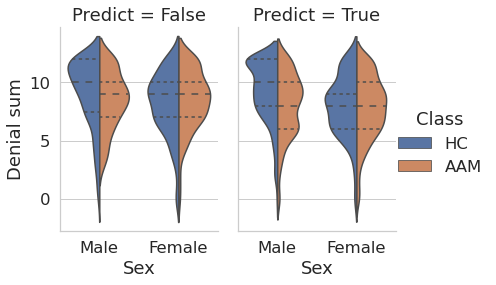

In [78]:
g = sns.catplot(x="Sex", y='Denial sum',
                hue="Class", col="Predict", inner="quartile",
                data=DF_I, kind="violin", split=True,
                height=4, aspect=.7);

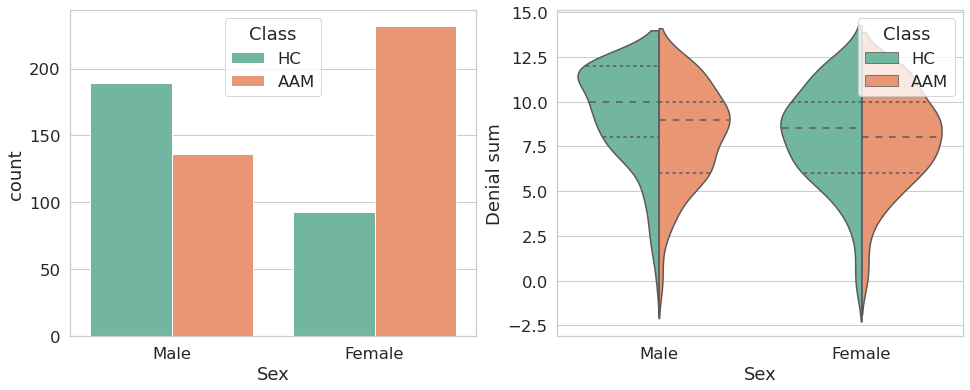

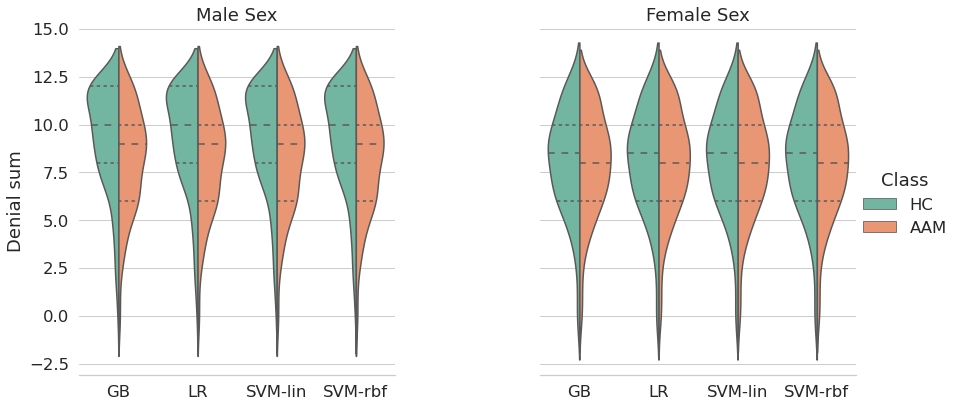

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16*1, 6*1))

sns.countplot(x="Sex", hue='Class', order=['Male', 'Female'], data = binge_CTQ,
                  ax = axes[0], palette="Set2", hue_order = ['HC', 'AAM'])
sns.violinplot(x="Sex", y='Denial sum', data=binge_CTQ, order=['Male', 'Female'],
                       hue='Class', palette="Set2", split=True, hue_order = ['HC', 'AAM'],
                       inner="quartile", ax = axes[1])
g = sns.catplot(ax = axes[1], x='Model', y='Denial sum',
                hue="Class", col="Sex", inner="quartile",
                data=DF_I, kind="violin", split=True, palette="Set2",
                height=6, aspect=1);

(g.set_axis_labels("", "Denial sum")
  .set_xticklabels(["GB", "LR", "SVM-lin", "SVM-rbf"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

In [147]:
DF_I['Model']

0            ('X', 'Binge', 'cb', 'GB')
1            ('X', 'Binge', 'cb', 'LR')
2       ('X', 'Binge', 'cb', 'SVM-lin')
3       ('X', 'Binge', 'cb', 'SVM-rbf')
4            ('X', 'Binge', 'cb', 'GB')
                     ...               
2595    ('X', 'Binge', 'cb', 'SVM-rbf')
2596         ('X', 'Binge', 'cb', 'GB')
2597         ('X', 'Binge', 'cb', 'LR')
2598    ('X', 'Binge', 'cb', 'SVM-lin')
2599    ('X', 'Binge', 'cb', 'SVM-rbf')
Name: Model, Length: 2600, dtype: object

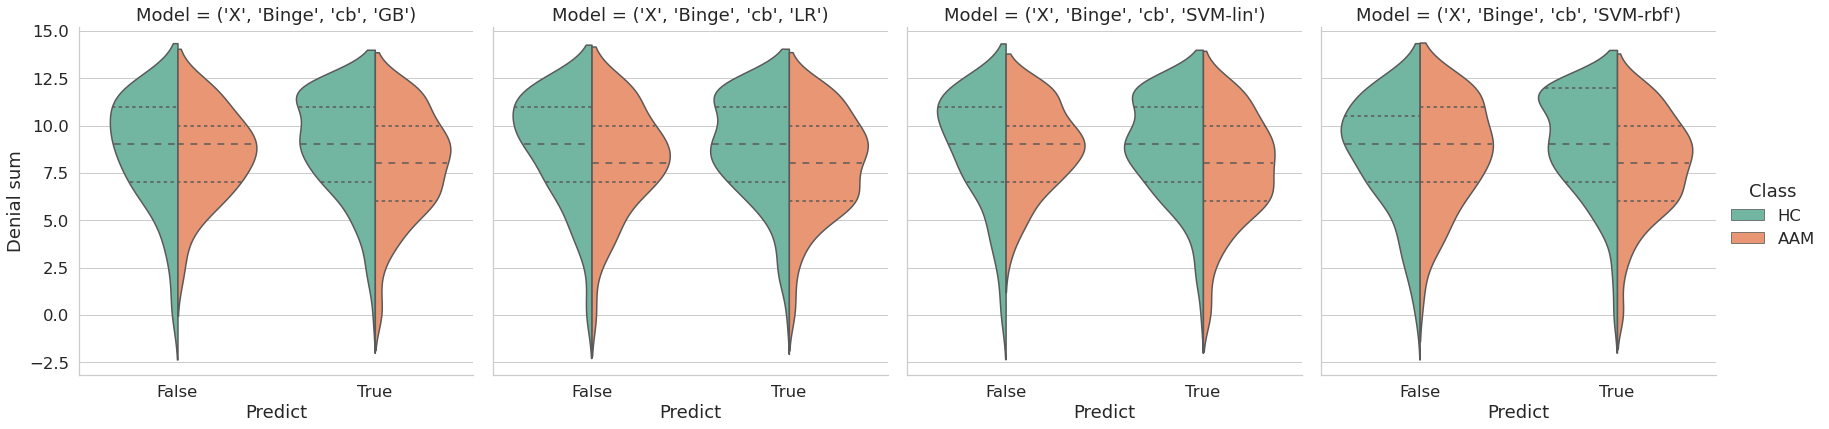

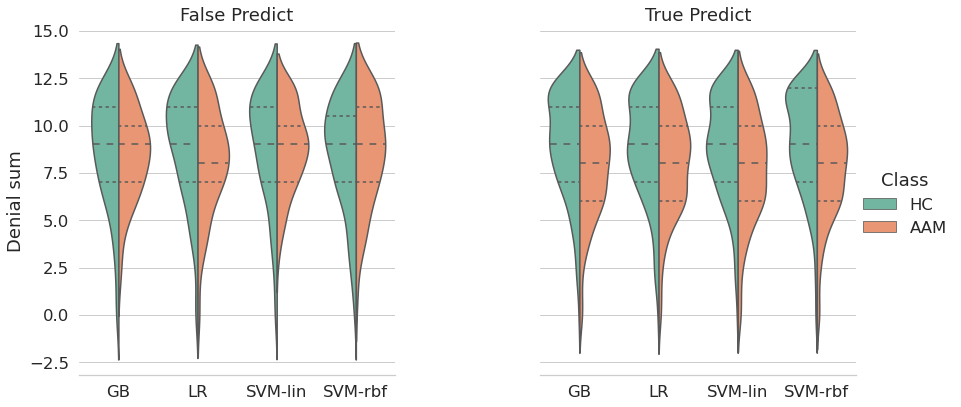

In [167]:
ax = sns.catplot(ax = axes[1], x="Predict", y='Denial sum',
                hue="Class", col="Model", inner="quartile",
                data=DF_I, kind="violin", split=True, palette="Set2",
                height=6, aspect=1); 

g = sns.catplot(ax = axes[1], x='Model', y='Denial sum',
                hue="Class", col="Predict", inner="quartile",
                data=DF_I, kind="violin", split=True, palette="Set2",
                height=6, aspect=1);

(g.set_axis_labels("", "Denial sum")
  .set_xticklabels(["GB", "LR", "SVM-lin", "SVM-rbf"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

In [160]:
# sns.catplot(ax = axes[1], x="Predict", y='Denial sum',
#                 hue="Sex", col="Model", inner="quartile",
#                 data=DF_I, kind="violin", split=True, palette="Set2",
#                 height=6, aspect=1);

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.584e-03 stat=-2.720e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.498e-02 stat=-2.435e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.708e-04 stat=-3.502e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

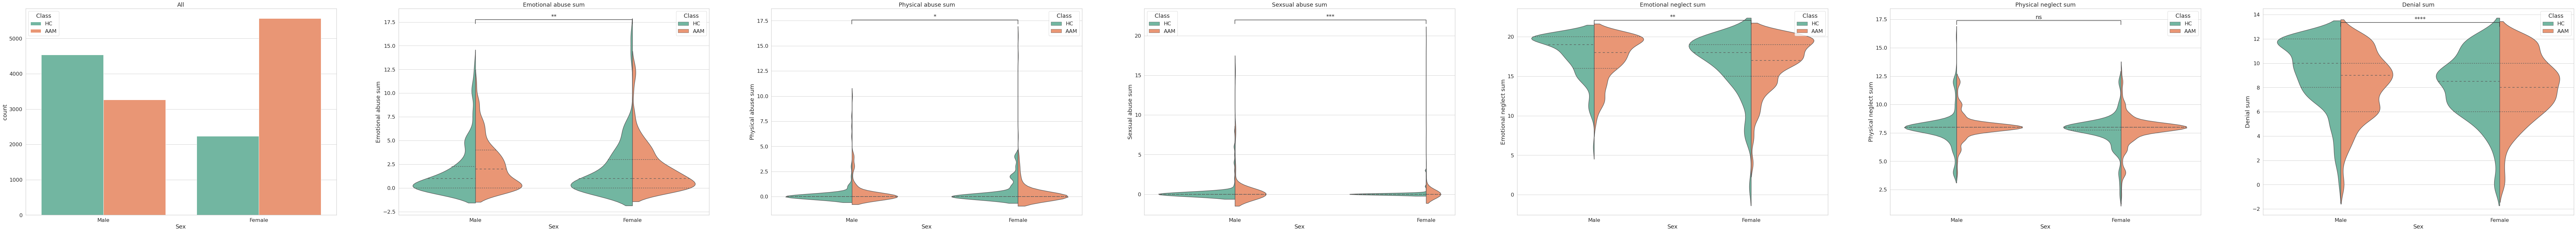

In [38]:
for (S, DF2) in [('All', binge_CTQ)]:
    columns = DF2.columns[15:]
    sns.set(style="whitegrid", font_scale=1.5)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=(24*len(columns), 12*1))
    sns.countplot(x="Sex", hue='Class', order=['Male', 'Female'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Sex", y=j, data=DF2, order=['Male', 'Female'],
                       hue='Class', palette="Set2", split=True, col='Predict',
                       inner="quartile", ax = axes[i+1])
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [15]:
# DF_EA['Instrument'] = 'Emotional abuse sum'
# DF_PA['Instrument'] = 'Physical abuse sum'
# DF_SA['Instrument'] = 'Sexsual abuse sum'
# DF_EN['Instrument'] = 'Emotional neglect sum'
# DF_PN['Instrument'] = 'Physical neglect sum'
# DF_DE['Instrument'] = 'Denial sum'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.750e-01 stat=-1.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.246e-01 stat=-1.216e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.093e-02 stat=-1.749e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

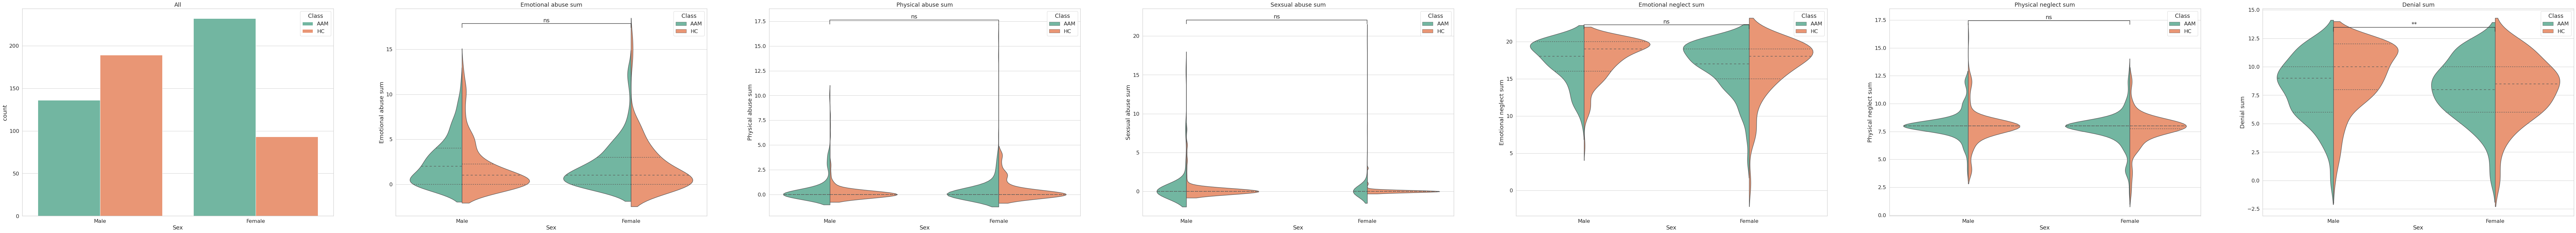

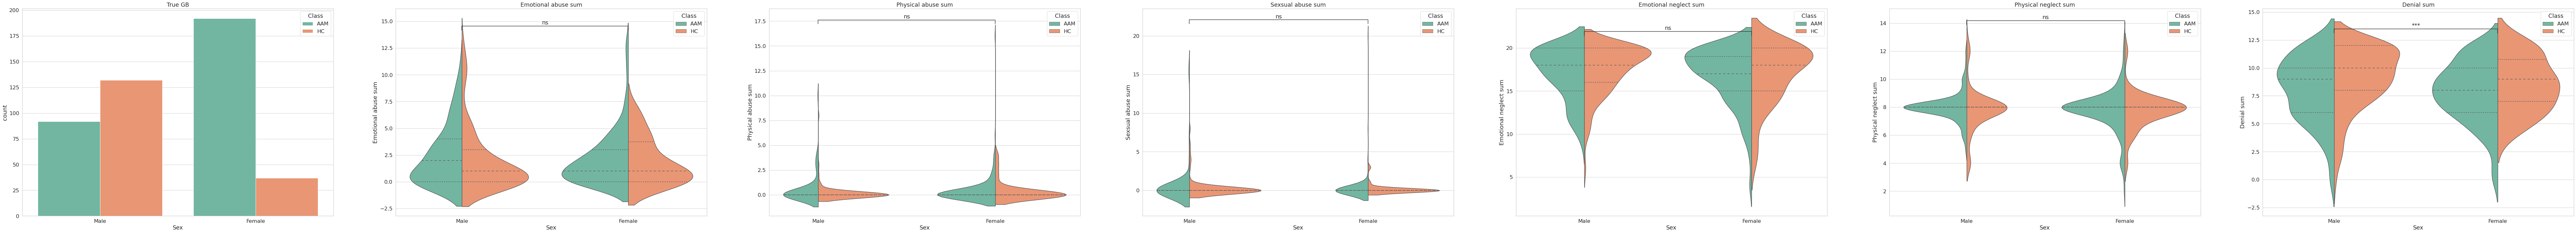

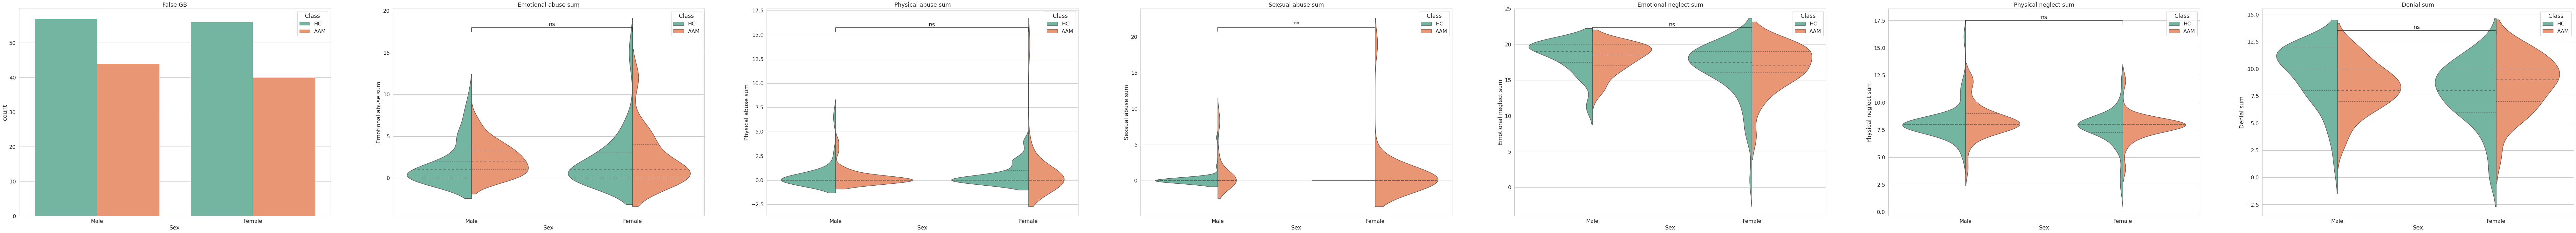

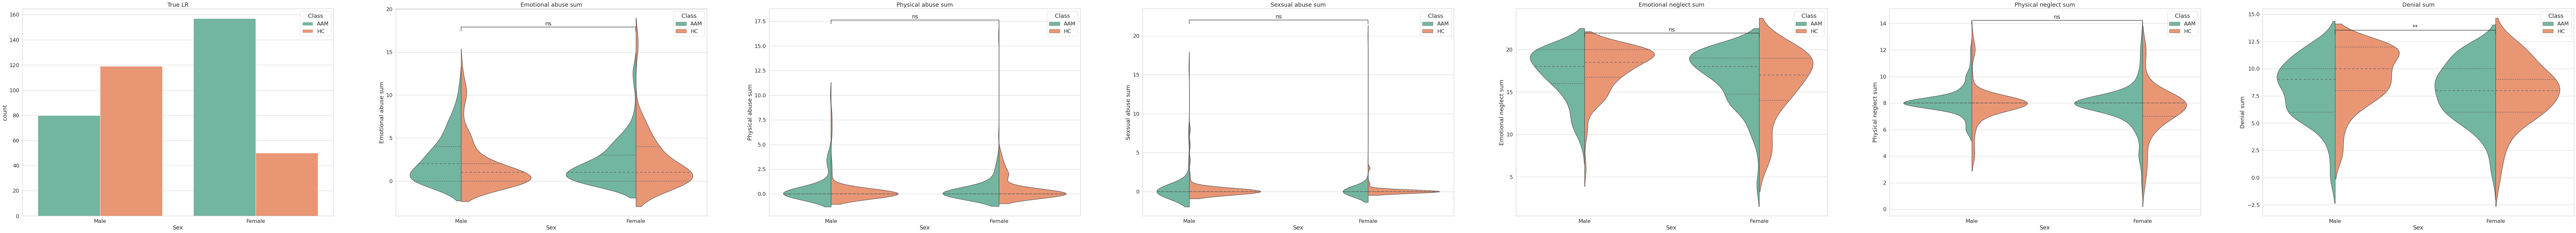

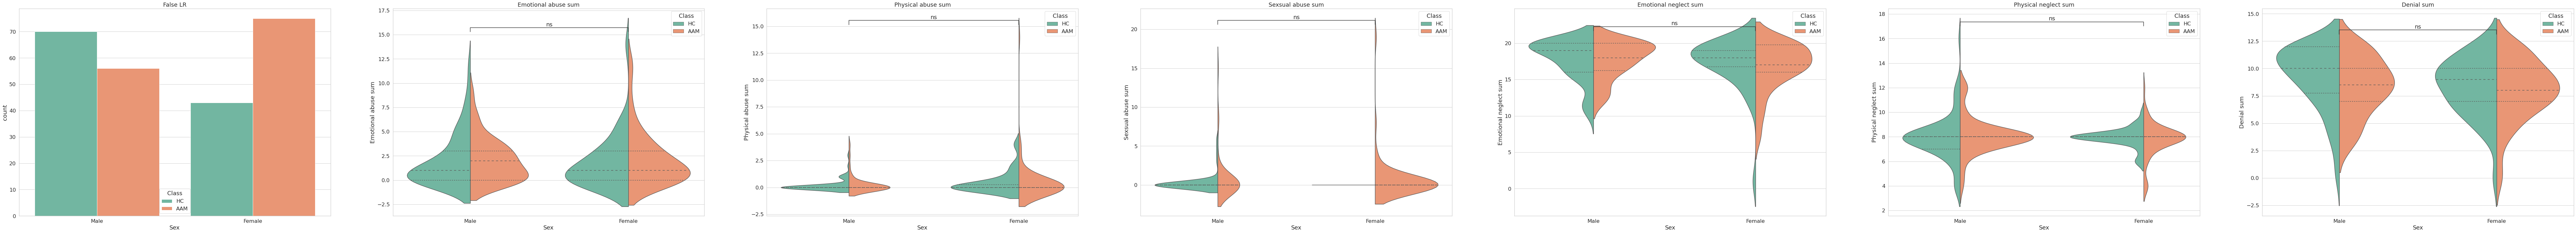

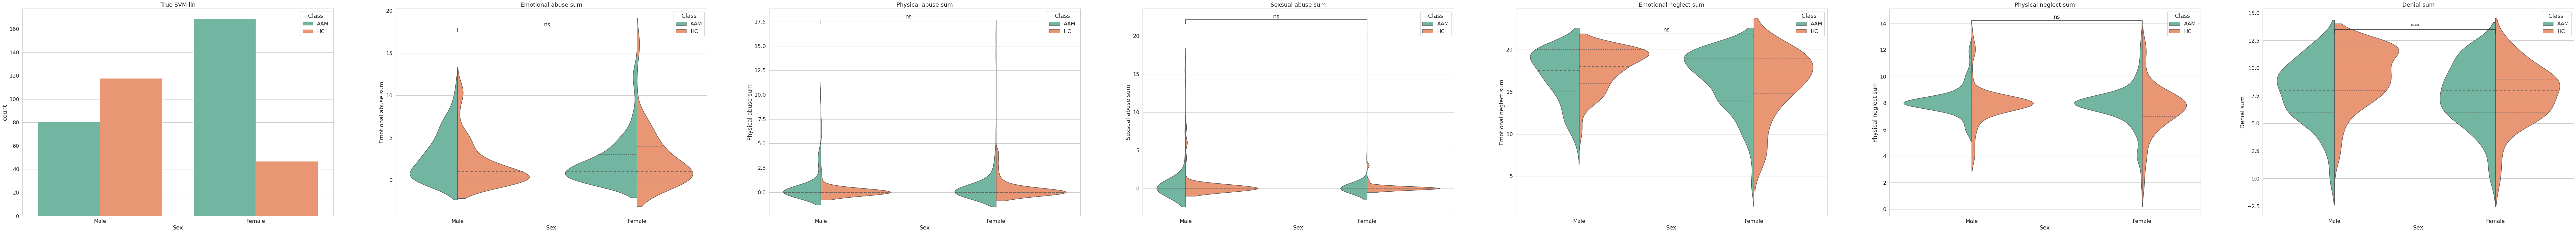

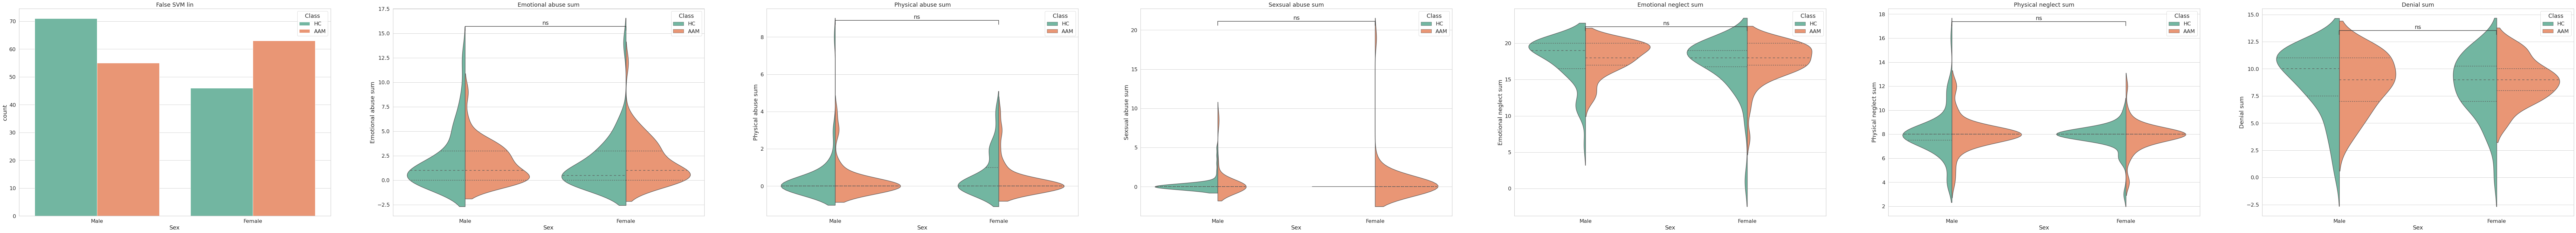

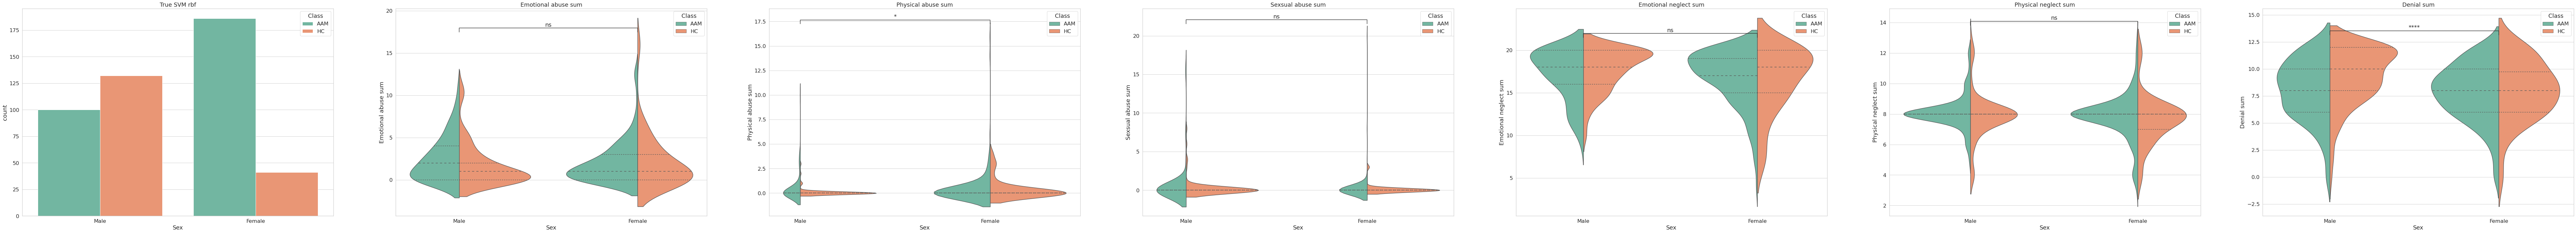

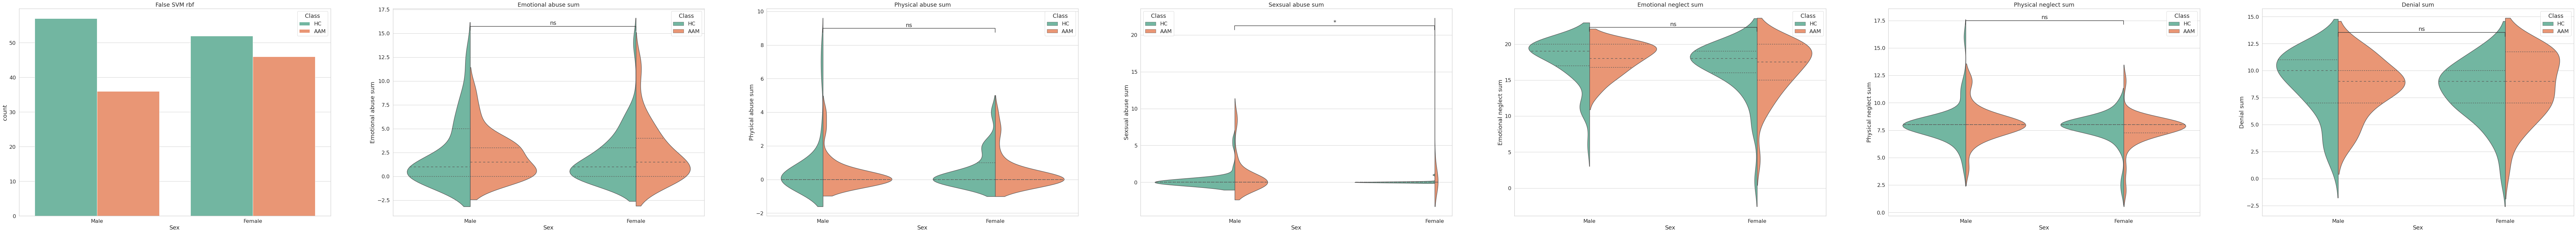

In [16]:
for (S, DF2) in [('All', binge_CTQ),
                ('True GB', binge_CTQ.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_CTQ.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_CTQ.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_CTQ.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:6]
    sns.set(style="whitegrid", font_scale=1.5)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=(24*len(columns), 12*1))
    sns.countplot(x="Sex", hue='Class', order=['Male', 'Female'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Sex", y=j, data=DF2, order=['Male', 'Female'],
                       hue='Class', palette="Set2", split=True, 
                       inner="quartile", ax = axes[i+1])
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

# CTQ

In [ ]:
CTQ = IMAGEN_instrument()
binge_CTQ = CTQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv'
)
col_binge_CTQ = binge_CTQ.columns[:-6]
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')

In [ ]:
DATA = [('All',binge_CTQ), ('Male',binge_CTQ_M), ('Female',binge_CTQ_F)]
ROI = [col_binge_CTQ[-1]]

In [ ]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

In [ ]:
DATA = [('All',binge_CTQ), ('Male',binge_CTQ_M), ('Female',binge_CTQ_F),
        ('GB T',binge_CTQ.set_index('ID').loc[GB_T]), ('GB F',binge_CTQ.set_index('ID').loc[GB_F]),
        ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
        ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
        ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])]
ROI = [col_binge_CTQ[-1]]

In [ ]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

In [ ]:
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')
binge_CTQ_GB_T = binge_CTQ.set_index('ID').loc[GB_T]
binge_CTQ_GB_T_M = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_T_F = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Female')
binge_CTQ_GB_F = binge_CTQ.set_index('ID').loc[GB_F]
binge_CTQ_GB_F_M = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_F_F = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Female')

# ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
# ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
# ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])

In [ ]:
DATA = [('All',binge_CTQ),('Male',binge_CTQ_M),('Female',binge_CTQ_F),
        ('GB T',binge_CTQ_GB_T),('GB T M',binge_CTQ_GB_T_M),('GB T F',binge_CTQ_GB_T_F),
        ('GB F',binge_CTQ_GB_F),('GB F M',binge_CTQ_GB_F_M),('GB F F',binge_CTQ_GB_F_F)]
ROI = [col_binge_CTQ[-1]]

In [ ]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

### CTQ

In [ ]:
for (S, DF2) in [('All', binge_CTQ),
                ('True GB', binge_CTQ.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_CTQ.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_CTQ.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_CTQ.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[5:6]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((2*len(columns)+1)**2, 2*len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

### SURPS

In [ ]:
SURPS = IMAGEN_instrument()
binge_SURPS = SURPS.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_SURPS.csv'
)

In [ ]:
for (S, DF2) in [('All', binge_SURPS),
                ('True GB', binge_SURPS.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_SURPS.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_SURPS.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_SURPS.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:4]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

### NEO

In [ ]:
NEO = IMAGEN_instrument()
df_binge_NEO = NEO.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_NEO.csv'
)
col_binge_NEO = df_binge_NEO.columns[:-6]

In [ ]:
binge_NEO_Session = df_binge_NEO.groupby(['Session'])
binge_NEO_BL = binge_NEO_Session.get_group('BL')
binge_NEO_FU1 = binge_NEO_Session.get_group('FU1')
binge_NEO_FU2 = binge_NEO_Session.get_group('FU2')
binge_NEO_FU3 = binge_NEO_Session.get_group('FU3')

In [ ]:
binge_NEO_FU3_Sex = binge_NEO_FU3.groupby(['Sex'])
binge_NEO_FU3_M = binge_NEO_FU3_Sex.get_group('Male')
binge_NEO_FU3_F = binge_NEO_FU3_Sex.get_group('Female')

binge_NEO_FU2_Sex = binge_NEO_FU2.groupby(['Sex'])
binge_NEO_FU2_M = binge_NEO_FU2_Sex.get_group('Male')
binge_NEO_FU2_F = binge_NEO_FU2_Sex.get_group('Female')

binge_NEO_FU1_Sex = binge_NEO_FU1.groupby(['Sex'])
binge_NEO_FU1_M = binge_NEO_FU1_Sex.get_group('Male')
binge_NEO_FU1_F = binge_NEO_FU1_Sex.get_group('Female')

binge_NEO_BL_Sex = binge_NEO_BL.groupby(['Sex'])
binge_NEO_BL_M = binge_NEO_BL_Sex.get_group('Male')
binge_NEO_BL_F = binge_NEO_BL_Sex.get_group('Female')

In [ ]:
binge_NEO = binge_NEO_FU3

In [ ]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [ ]:
binge_NEO = binge_NEO_FU2

In [ ]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [ ]:
binge_NEO = binge_NEO_FU1

In [ ]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [ ]:
binge_NEO = binge_NEO_BL

In [ ]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 